In [89]:
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [90]:
# Генерація штучного регресійного набору даних
features, target = make_regression(
    n_samples=100,       
    n_features=1,        
    noise=12,            
    random_state=10      
)

In [91]:
# Формування DataFrame
synthetic_df = pd.DataFrame({
    'Feature': features.flatten(),
    'Target': target
})

print(synthetic_df.head())

    Feature     Target
0 -1.136602 -25.701587
1 -1.418556 -40.037675
2  1.744814  73.052311
3 -0.232182 -10.504627
4 -0.489337 -18.432743


In [92]:
# Розділення на тренувальні і тестові дані
F_train, F_test, T_train, T_test = train_test_split(
    synthetic_df[['Feature']], synthetic_df['Target'], 
    test_size=0.2, random_state=10
)

In [93]:
# Створення та навчання моделі
synthetic_model = LinearRegression()
synthetic_model.fit(F_train, T_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [94]:
# Передбачення
T_pred = synthetic_model.predict(F_test)

In [95]:
# Оцінка моделі
mse_syn = mean_squared_error(T_test, T_pred)
mae_syn = mean_absolute_error(T_test, T_pred)

print(f"MSE: {mse_syn:.2f}, MAE: {mae_syn:.2f}")

MSE: 97.39, MAE: 8.11


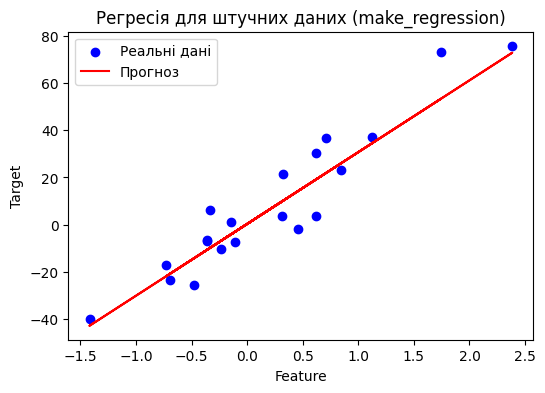

In [96]:
# Візуалізація
plt.figure(figsize=(6,4))
plt.scatter(F_test, T_test, color='blue', label='Реальні дані')
plt.plot(F_test, T_pred, color='red', label='Прогноз')
plt.title('Регресія для штучних даних (make_regression)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()